# Compte Rendu mini-projet expérimental: Digue
### Antoine Molines

## Introduction
Le but de ce mini-projet est de calculer et étudier l'équilibre d'une sigue en béton soumis à des forces de pression en utilisant des outils numériques. Nous allons premièrement modéliser avec des fonctions les géométries de la digue, puis avec des outils d'intégration numériques nous pourront étudier l'équilibire statique de la digue en fonction de sa géométrie.

## I/Modélisation
Dans un premier temps, nous allons modéliser la digue par des fonctions pour déterminer sa géométrie ainsi que les forces qu'elle subie.
### Forces agissant sur le système:
Il y a deux forces principales agissant sur le système: les forces de pressions de l'eau $\vec{F_p}$ et le poid de la digue $\vec{P}$. il y a aussi les forces de réaction: $\vec{R}=\vec{T}+\vec{N}$ qui permettent à la digue de ne pas glisser
Ces forces ont pour expressions:
$$\vec{F_p}=\iint_S \vec{\mathrm{d}F} =\iint_S P d\vec{S}$$, avec $P(y)=\rho g (H-y)$, $H$ la hauteur de la digue.
En projetant sur les axes x (ici orienté vers le haut) et y (vers la droite), on obtient l'équilibre statique:
$$-(P+F_{py})+N=0 ; -F_{py}+T=0$$
### Modélisation de la géométrie par des fonctions:
Pour cette première partie, nous allons modéliser la digue par deux fonction affine de cette manière:

In [2]:
import numpy as np
import matplotlib.pyplot as plt

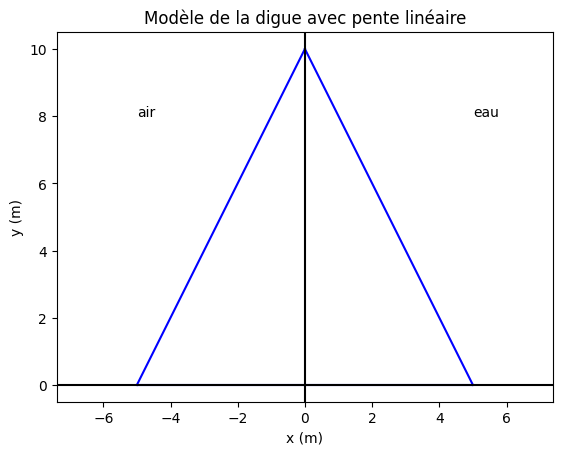

In [3]:
# Ce code permet d'afficher les courbes représentant la digue

H = 10
xa = -5
xe = +5


# On définit les fonctions côté eau et côté air, ici les courbes concaves
def fair(y):
    return -(y - H) * xa / H

def feau(y):
    return  -(y - H) * xe / H 

# On crée un tableau de y
y = np.linspace(0, H, 1000)

# On trace
plt.plot(fair(y), y, '-b') 

plt.plot(feau(y), y, '-b')  ## Décommenter après avoir codé la fonction feau(x)

plt.plot([xe, xa], [0, 0], '-b') # Bas de la digue
plt.xlabel('x (m)') 
plt.ylabel('y (m)')
plt.text(xe, 8, 'eau')
plt.text(xa, 8, 'air')
plt.axis('equal') # Permet d'avoir un plot isométrique
plt.axhline(0, color = "black")
plt.axvline(0, color = "black")
plt.xlim(-8, 8)
plt.title("Modèle de la digue avec pente linéaire")
plt.show()

où l'on a utilisé les fonctions: $$
f_{air}(y) = -\frac{x_a}{H}.(y-H); f_{eau}(y) = -\frac{x_e}{H}.(y-H)
$$
avec $H=10$, $x_e=5$, $x_a=-5$

## II/Equilibre statique pour les pentes droites.
Dans un premier temps, nous allons calculer le volume de la digue en pente droite par intégration des deux fonction tracées (en supposant qu'elle a pour épaisseur $1m$:

In [4]:
n = 1000000             #nombre d'itération
H = 10                  #définition des constantes/bornes
xa, xe = -5, 5

delta_y = H / n         #définition du pas

volume_a = 0            #initilisaiton
volume_e = 0

for i in range(n):           #boucle sur tout les pas
    y = i * delta_y  
    aire_a = fair(y) * delta_y      #calcul des 2 aires simultanement
    aire_e = feau(y) * delta_y  
    volume_a += aire_a              #ajout
    volume_e += aire_e

print("le volume de la digue est:",abs(volume_a) + abs(volume_e),"m^3") 


le volume de la digue est: 50.000049999999995 m^3


Nous voyons bien que la valeur obtenue par intégration est proche de la valeur théoriqe: $V=0.5(base*hauteur)=0.5*(10*10)=50 m^3$.

Nous pouvons donc maintenant, en définissant le repère ci dessous, calculer les resultantes des forces:

![DigueAngles.png](./DigueAngles.png)

et avecs les relations: $$
tan(\theta) = f'(y)
$$
;
$$
\vec n = \sin(\theta).\vec{u_y} - \cos(\theta).\vec{u_x} 
$$


Les forces de pressions se résument dans notre cas à:$$
\vec{F} = \iint_S \vec{\mathrm{d}F} =\int_0^H P(y) \mathrm{d}l . \vec{n}
$$, et en utilisant :$$
\mathrm{d}l = \frac{\mathrm{d}y}{\cos(\theta)}
$$ nous pouvons en déduire que:
$$F_y=\int_0^{H}-\rho g (H-y)\frac{x_e}{H}dy$$ et$$ F_x=\int_0^{H}-\rho g (H-y)dy$$

Aisni, en intégrant numériquement on obtient:

In [5]:
rho_g = 10000  # rho*g
n = 100000  # nombre d'itérations

#dérive de f_eau
df_eau = -xe / H 

#défintion du pas
delta_y = H / n

#initialisation
Fx, Fy = 0, 0

#boucle
for i in range(n):
    y = i * delta_y
    P = rho_g * (H - y)  #pression
    dF_y = P * df_eau * delta_y  #composante en x
    dF_x = -P * delta_y  #composante en y
    Fx =Fx+ dF_x
    Fy = Fy+dF_y

print("Résultante des forces de pression de l'eau :")
print(f"Fy = {Fy:.2f} N")
print(f"Fx = {Fx:.2f} N")

Résultante des forces de pression de l'eau :
Fy = -250002.50 N
Fx = -500005.00 N


Nous voyons bien que ces résultats sont cohérents avec le repère choisis, car les forces sont toutes deux négatives, et celles en x et bien plus forte que celle en y.

En utilisant le fait que $T=\mu N$ avec $\mu=0.5$, on peut étudier l'équilibre statique en calculant le rapport $T/N$:

In [6]:
g=10
rhobeton=3000
Vdigue=50
Poiddigue=-rhobeton*Vdigue*g
T=-Fx
N=-Fy-Poiddigue
print("le rapport T/N est:",T/N)



le rapport T/N est: 0.285716734690379


Le rapport étant inférieur à $\mu=0.5$, la digue est en équilibre statique.

On peut reprendre ce calcul pour différente géométrie: premiérement avec $x_e=0$ et $x_a=-5$:

In [7]:
xa=-5
xe=0
h=10

df_eau = -xe / H 
Vdigue=25
Poiddigue=-rhobeton*Vdigue*g
#défintion du pas
delta_y = H / n
#initialisation
Fx, Fy = 0, 0
#boucle
for i in range(n):
    y = i * delta_y
    P = rho_g * (H - y)  #pression
    dF_y = P * df_eau * delta_y  #composante en x
    dF_x = -P * delta_y  #composante en y
    Fx =Fx+ dF_x
    Fy = Fy+dF_y

print("Résultante des forces de pression côté eau :")
print(f"Fy = {Fy:.2f} N")
print(f"Fx = {Fx:.2f} N")

T=-Fx
N=-Fy-Poiddigue
print("le rapport T/N est:",T/N)

Résultante des forces de pression côté eau :
Fy = 0.00 N
Fx = -500005.00 N
le rapport T/N est: 0.6666733333333333


Dans cette géométrie le rapport supérieur au coefficient statique, et ainsi la digue n'est pas en équilibre statique. 
Maintent, avec $x_e=5$ et $x_a=0$:

In [8]:
xa=0
xe=5
h=10

df_eau = -xe / H 

#défintion du pas
delta_y = H / n

Vdigue=25
Poiddigue=-rhobeton*Vdigue*g
#initialisation
Fx, Fy = 0, 0
#boucle
for i in range(n):
    y = i * delta_y
    P = rho_g * (H - y)  #pression
    dF_y = P * df_eau * delta_y  #composante en x
    dF_x = -P * delta_y  #composante en y
    Fx =Fx+ dF_x
    Fy = Fy+dF_y

print("Résultante des forces de pression côté eau :")
print(f"Fy = {Fy:.2f} N")
print(f"Fx = {Fx:.2f} N")

T=-Fx
N=-Fy-Poiddigue
print("le rapport T/N est:",T/N)

Résultante des forces de pression côté eau :
Fy = -250002.50 N
Fx = -500005.00 N
le rapport T/N est: 0.500003749990625


En revanche, ici la digue est en équilibre statique, car elle est à la limite du coefficient statique (la faible erreur vient de l'intégration)

Dans le premier cas, la digue n'est pas en équilibre car elle fait une pente verticale avec l'eau, et ainsi il n'y a pas de force selon y pour compenser les pressions, alors que dans le second cas la digue fait une pente ce qui permet l'apparition d'une force selon y qui va aider à l'équilibre.


## III/Equilibre statique pour les pentes courbes.
Dans cette partie, nous allons changer de modèle de digue pour change la symétrie de l'interface eau-béton pour avoir une pente convexe.
L'expression de la fonction décrivant cette pente est:
$$f_{eau} (y)=a \left(\frac{y}{H}\right)^2-(a+x_e)\left(\frac{y}{H}\right) +x_e$$
Sa dérivé est donné par:
$$
f'_{eau} (y)=\frac{2ay}{H^2}-\frac{a+x_e}{H}
$$

Affichons dans un premier temps ce nouveau modèle:

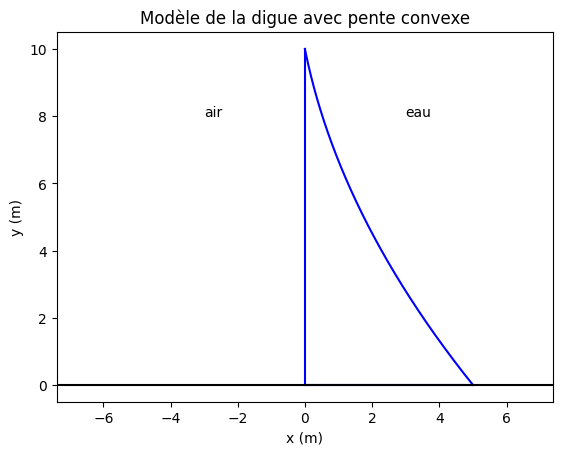

In [9]:
# Ce code permet d'afficher les courbes représentant la digue

H = 10
xe = 5
xa = 0

# On définit les fonctions côté eau et côté air, ici les courbes concaves
a = 3
def feau(y):
    return a * (y / H) ** 2 - (a + xe) * (y / H) + xe
def fair(y):
    return (H - y) * xa / H

# On crée un tableau de y
y = np.linspace(0, H, 1000)

# On trace
plt.plot(feau(y), y, '-b')
plt.plot(fair(y), y, '-b')
plt.plot([xe, xa], [0, 0], '-b')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.text(3, 8, 'eau')
plt.text(-3, 8, 'air')
plt.axis('equal') # Permet d'avoir un plot isométrique
plt.axhline(0, color = "black")
#plt.axvline(0, color = "black")
plt.xlim(-8, 8)
plt.title("Modèle de la digue avec pente convexe")
plt.show()


De façon similaire à avant, nous pouvons étudier l'équilibre statique de la digue en calculant les forces de pression et de poid:

Volume de béton:

In [10]:
n = 1000000
H = 10
xa, xe = 0, 5

delta_y = H / n

volume = 0


for i in range(n):
    y = i * delta_y  
    
    aire = feau(y) * delta_y  
    volume += aire
    

print("Le volume de la nouvelle digue est:",volume)

Le volume de la nouvelle digue est: 20.000025000005838


Les forces de pressions sont: